# Intelligent Editor Environment (in Auszügen)
## Simulation und Modellierung WS19/20: Textstatistik
### Marvin Beese, 786300, marvin.beese@uni-potsdam.de

##### Nutzungshinweise
Zu beachten ist, dass die Textdatei _Die Leiden des jungen Werthers.txt_ im Heimverzeichnis im Desktop-Verzeichnis gespeichert werden muss.

In [1]:
import re
import os
import string
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg, NavigationToolbar2Tk
%matplotlib notebook

#### Statistische Analyse der Wörter in einem Text
Funktion _L=splitstring(s)_ 

mit String _s_, Liste _L_

In [2]:
"""gets words from input string and returns List of words"""
def splitstring(textInput):
    wordList = re.split(r'[\.\,\;\s\:\"\!\?]\s*', str(textInput))
    return wordList

#### Einlesen einer Datei und Identifizierung der einzelnen Wörter im Text
Funktion _n,W = textStats(file, ReturnDict=False)_

mit Integer _n_, Wörterbuch _W_, Textdatei _file_, boolean _ReturnDict_

In [3]:
"""input file to count including words,
        returns number or Words, Dictionary(key: string word, value: int occurrences)"""
def textStats(file, ReturnDict=False):
    # read file and save input in List
    print(file)
    f= open(file, mode='r')
    fileContent = f.read()
    currWordList = splitstring(fileContent)
    # count words
    wordDict={};fullwordList=[]; upperWords=[]
    if(ReturnDict==True):
        for word in currWordList:
            if word.isalpha():
                fullwordList.append(word)
                # only get Eigennamen and Nomen through firstly checking all lowercase words and checking the remaining upper case letters afterwards
                if(word[0].isupper()):
                    upperWords.append(word)
                    continue
                # increment when already found in text
                if word.casefold() in wordDict:
                    wordDict[word.casefold()]+=1
                else:
                    wordDict[word]=1
            # special case: apostrophe in word
            elif "\'" in word:
                fullwordList.append(word)
                if word.casefold() in wordDict:
                    wordDict[word.casefold()]+=1
                else:
                    wordDict[word]=1
        for word in upperWords:
            if word.casefold() in wordDict:
                wordDict[word.casefold()]+=1
            elif word in wordDict:
                wordDict[word]+=1
            else:
                wordDict[word]=1
    wordOccurrences = len(fullwordList)
    return wordOccurrences, wordDict

In [4]:
globalPath = os.path.normpath(os.path.join(os.environ["HOMEPATH"], "Desktop"))
file = os.path.normpath(os.path.join(globalPath, 'Die Leiden des jungen Werthers.txt'))
print(file)
anzahl, woerterbuch = textStats(file,True)
print(anzahl, woerterbuch)

\Users\beese\Desktop\Die Leiden des jungen Werthers.txt
\Users\beese\Desktop\Die Leiden des jungen Werthers.txt
35926 {'froh': 2, 'bin': 68, 'ich': 1121, 'daÃŸ': 1, 'weg': 24, 'was': 153, 'ist': 368, 'das': 515, 'des': 168, 'zu': 572, 'verlassen': 13, 'den': 381, 'so': 357, 'liebe': 47, 'von': 270, 'dem': 328, 'unzertrennlich': 1, 'war': 207, 'und': 1405, 'sein': 162, 'weiÃŸ': 1, 'du': 219, 'verzeihst': 1, "mir's": 28, 'nicht': 453, 'meine': 126, 'recht': 27, 'ausgesucht': 1, 'vom': 52, 'um': 159, 'ein': 294, 'wie': 314, 'arme': 12, 'doch': 82, 'unschuldig': 3, "Konnt'": 1, 'die': 904, 'eigensinnigen': 1, 'ihrer': 45, 'mir': 348, 'eine': 170, 'angenehme': 2, 'verschafften': 1, 'in': 489, 'armen': 14, 'sich': 312, 'bildete': 1, 'ganz': 63, "Hab'": 1, 'ihre': 113, 'mich': 361, 'an': 228, 'wahren': 9, 'der': 789, 'uns': 85, 'oft': 56, 'lachen': 5, 'machten': 4, 'wenig': 18, 'sie': 755, 'waren': 38, 'selbst': 64, 'ergetzt': 1, 'er': 441, 'klagen': 3, 'darf': 10, 'will': 59, 'lieber': 36, '

#### Top-100 Wörter in der Datei

Sortieren des Wörterbuches mittels: _L=sortTextStats(List)_

mit Liste _L_, _List_

Erstellen einer __Tabelle__ mit den 100 höchsten Werten mittels: _table, Substantive=buildTable(sortedList)_

mit String _table,_ _Substantive_ und Liste _sortedList_

In [5]:
"""sorts a list starting with the highest number of occurrences using lambda expression"""
def sortTextStats(List):
    return sorted(List.items(), key=lambda x: x[1], reverse=True)

"""builds a table for the first 100 entries of the sorted Dictionary sortedList"""
def buildTable(sortedList):
    # get values
    limit=100
    i = 0
    outputTxt=""; upperWords=""
    for k, v in sortedList:
        if (i >= limit):
            break
        i = i + 1
        outputTxt += "{0}:\t{1}\t{2}\n".format(i, k, v)
        if(str(k)[0].isupper()):
            upperWords += " {0}".format(str(k))
    return outputTxt, upperWords

In [6]:
sortiertDict = sortTextStats(woerterbuch)
table, Substantives = buildTable(sortiertDict)
print(table)
print("Substantive: {0}".format(Substantives))

1:	und	1405
2:	ich	1121
3:	die	904
4:	der	789
5:	sie	755
6:	zu	572
7:	das	515
8:	in	489
9:	nicht	453
10:	er	441
11:	den	381
12:	ist	368
13:	mit	367
14:	mich	361
15:	so	357
16:	mir	348
17:	dem	328
18:	es	328
19:	wie	314
20:	sich	312
21:	ein	294
22:	auf	286
23:	von	270
24:	ihr	233
25:	an	228
26:	du	219
27:	wenn	213
28:	war	207
29:	als	193
30:	eine	170
31:	des	168
32:	da	165
33:	sein	162
34:	um	159
35:	was	153
36:	habe	141
37:	nach	136
38:	einen	134
39:	wir	133
40:	ihm	131
41:	am	129
42:	ihn	127
43:	meine	126
44:	mein	125
45:	noch	118
46:	alles	116
47:	aus	115
48:	auch	115
49:	ihre	113
50:	vor	108
51:	hat	107
52:	sagte	106
53:	einem	105
54:	im	104
55:	nur	91
56:	man	90
57:	wieder	89
58:	einer	87
59:	hatte	86
60:	uns	85
61:	doch	82
62:	sind	78
63:	wohl	76
64:	seine	75
65:	dir	74
66:	aber	74
67:	kann	73
68:	nun	73
69:	Seele	72
70:	nichts	70
71:	denn	70
72:	bin	68
73:	seiner	68
74:	Lotte	68
75:	bei	67
76:	wird	66
77:	alle	65
78:	selbst	64
79:	ganz	63
80:	mehr	62
81:	hier	62
82:	dich	62
83:	H

#### Plotten der Wörter über den Rang auf einer doppelt logarithmischen Skala

Berechnen der Plot-Daten mittels _x,y,word = calcPlot(limit, sortedDict)_ und mit _buildPlot(limit, sortedDict)_

mit np.array _x, y, word, _ integer _limit_ und dictionary _sortedDict_

In [7]:
"""calc plot with defined word-limit. Rank (i), Occurrences (v) and Word (k) are used"""
def calcPlot(limit, sortedDict):
    x=np.array([])
    y=np.array([])
    word=np.array([])
    i = 0
    for k,v in sortedDict:
        if (i >= limit):
            break
        i+=1
        x= np.append(x,i)
        y=np.append(y,v)
        word= np.append(word, k)
    return x,y,word

def buildPlot(limit, x, y, word):
    # get values
    x = np.asarray(x); y = np.asarray(y); word=np.asarray(word)
    a= plt.scatter(x, y, c='red')

    for i, txt in enumerate(word):
        a = plt.annotate(txt, (i + 1, y[i]), xycoords='data')

    a = plt.title("Most frequent Words", fontsize=16)
    a = plt.ylabel("Occurrences", fontsize=9)
    a = plt.xlabel("Word Rank", fontsize=9)
    a = plt.grid(True)
#     a.tick_params(labelsize=8)
    a= plt.xscale(value='log')
    a= plt.yscale(value='log')
    return a

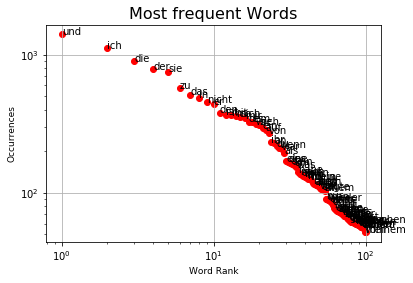

In [8]:
x,y,word = calcPlot(100,sortiertDict)
buildPlot(100, x,y,word)

#### Berechnung und Darstellung der Steigung der Geraden durch die gegebenen Punkte

Berechnung der Steigung der Geraden mittels linearer Regressionsanalyse über die Top-100 Wörter mit _slope=linRegSlope(xArr, yArr, max), calcXMedian(xArr, max), calcYMedian(yArr, max), calcSxx(xArr, xMed, max), calcSxy(xArr,yArr,xMed,yMed,max)_

Hierbei ist _xMed_ und _yMed_ das Median über die gegebenen x- bzw. y-Werte, $Sxx = \sum_{i=0}^{n=max-1}({x_i - x_{Med}})^2$, $Sxy= \sum_{i=0}^{n=max-1}({x_i - x_{Med}})*({y_i - y_{Med}})$ und $slope= \frac{Sxy}{Sxx}$

Darstellung der Steigung der Verteilung der Top-100-Wörter auf einer log-log-Skala mittels _drawSlope(slope, x, y, size)_

In [9]:
# (\sum_{i=0}^{n=max-1}{x_i})/n
def calcXMedian(xArr, max):
    xSum=0
    for i in range(max):
        xSum+=xArr[i]
    xMedian=xSum/max
    print("\txMedian: ", xMedian)
    return xMedian

# (\sum_{i=0}^{n=max-1}{y_i})/n
def calcYMedian(yArr, max):
    ySum=0
    for i in range(max):
        ySum+=yArr[i]
    yMedian=ySum/max
    print("\tyMedian: ",yMedian)
    return yMedian

"calculates the average square of deviation"
# \sum_{i=0}^{n=max-1}{x_i - xMed}^2
def calcSxx(xArr, xMed, max):
    Sxx=0
    for i in range(max):
        Sxx+= (xArr[i]-xMed)**2
    print("\tSxx: ",Sxx)
    return Sxx

"calculates the product of the x- and y-Deviation"
# \sum_{i=0}^{n=max-1}{x_i - xMed}*{y_i - yMed}
def calcSxy(xArr, yArr, xMed, yMed, max):
    Sxy=0
    for i in range(max):
        Sxy+=(xArr[i]-xMed)*(yArr[i]-yMed)
    print("\tSxy: ",Sxy)
    return Sxy

"calculates Slope of Distribution using linear Regression"
# \frac{Sxy}{Sxx}
def linRegSlope(xArr, yArr, max):
    xMed = calcXMedian(xArr, max)
    yMed = calcYMedian(yArr, max)
    Sxy = calcSxy(xArr, yArr, xMed, yMed, max)
    Sxx = calcSxx(xArr, xMed, max)
    slope = Sxy / Sxx
    print("slope: ", slope)
    print("\t{0}/{1}={2}".format(Sxy, Sxx, slope))
    return slope

def drawSlope(slope, x, y, size):
    # get values
    startx = x[0]
    endx = x[-1:]
    starty = y[0] 
    endy = starty+x[size-1]*slope
    # plot graph
    b = plt.plot([startx, endx],[starty,endy], c='blue')
    b = plt.title("Most frequent Words", fontsize=16)
    b = plt.ylabel("Occurrences", fontsize=9)
    b = plt.xlabel("Word Rank", fontsize=9)
    b = plt.grid(True)
    b= plt.xscale(value='log')
    b= plt.yscale(value='log')
    b = plt.scatter(x, y, c='red')
    for i, txt in enumerate(word):
        b = plt.annotate(txt, (i + 1, y[i]), xycoords='data')

	xMedian:  50.5
	yMedian:  194.19
	Sxy:  -474342.5000000002
	Sxx:  83325.0
slope:  -5.692679267926795
	-474342.5000000002/83325.0=-5.692679267926795


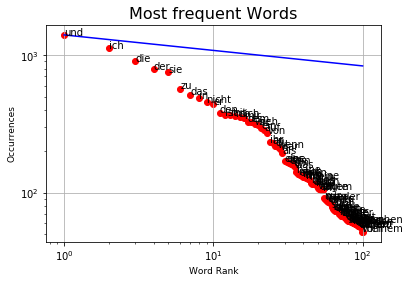

In [10]:
slope = linRegSlope(x,y,x.size)
drawSlope(slope, x, y, x.size)

#### Berechnung des Exponentens der Zipf-Verteilung

Berechnung des Exponentens mittels _exp = exponentZipf(xArr, yArr, max)._

Hierbei wird die Funktion _linRegSlope_ aufgerufen.

Es gilt $exp= 1+ \frac{1}{|m|}$ .

In [11]:
"calculates the exponent of the Distribution"
# exp= 1+ \frac{1}{|m|} //m = linRegSlope() //Exponent der Verteilungsfunktion
def exponentZipf(xArr, yArr, max):
    m = linRegSlope(xArr, yArr, max)
    exp = 1+ (1/ abs(m))
    print("expZipf: ",exp)
    print("\t1+(1/{0}) = {1}".format(abs(m),exp))
    return exp

In [12]:
exponentZipf(x,y,x.size)

	xMedian:  50.5
	yMedian:  194.19
	Sxy:  -474342.5000000002
	Sxx:  83325.0
slope:  -5.692679267926795
	-474342.5000000002/83325.0=-5.692679267926795
expZipf:  1.1756642088786056
	1+(1/5.692679267926795) = 1.1756642088786056


1.1756642088786056

#### Generierung von Zufallstexten in einer Textdatei 
##### Von Affen und Schreibmaschinen

Hierbei ist die Wahrscheinlichkeit _p = splitterProbability_ für Leer- oder Satzzeichen und die Wahrscheinlichkeit _1-p = letterProbability_ für beliebige Buchstaben des deutschen Alphabets.
Periodisch wiederkommende Zeilenumbrüche treten nach _n = lineBreak_ Zeichen auf. 
Die Anzahl der Zeichen einer Datei wird mit _size_ festgelegt. 

Es werden die Funktionen _randomLetter(),_ _randomSplitter(),_ _randomTextGeneration(letterProbability, lineBreakNr, size)_ und _randomTextFile(letterProbability, lineBreakNr, size)_ verwendet.

In [13]:
"""creates randomly a letter of the eng/ger alphabet"""
def randomLetter():
    alphabetList = np.array(list(string.ascii_letters))
    germanLetters = np.array(['ä', 'ö', 'ü', 'Ä', 'Ö', 'Ü', 'ß'])
    alphabetList= np.concatenate((alphabetList, germanLetters), axis=None)
    letter = np.random.choice(alphabetList)
    return letter

"""creates randomly a space or punctuation"""
def randomSplitter():
    splitSymb = np.array([' ',',','.',';',':','!','?']) #[\.\,\;\s\:\"\!\?]
    splitter = np.random.choice(splitSymb)
    return splitter

"""creates words and splitter depending on respective probability of given size. 
    Linebreaks are included after a given number of elements"""
def randomTextGeneration(letterProb, linebreakNr, size):
    # Probabilities
    letterProbability = letterProb
    splitterProbability = 1-letterProbability
    linebreak = linebreakNr

    randomText=""
    for step in range (1,size+1):
        if(step%linebreak==0):
            randomText+="\n"
        else:
            letter=randomLetter()
            splitter=randomSplitter()
            choosenChar= np.random.choice([letter,splitter],1,p=[letterProbability, splitterProbability])
            randomText+=choosenChar[0]
    randomText = str(randomText)
    print(randomText)
    return randomText

"""invokes randomTextGeneration() and writes the text into the text RandomText.txt"""
def randomTextFile(letterProb, linebreakNr, size):
    randomText = randomTextGeneration(letterProb, linebreakNr, size)
    globalPath = os.path.normpath(os.path.join(os.environ["HOMEPATH"], "Desktop"))
    filename = os.path.normpath(os.path.join(globalPath, 'RandomText.txt'))
    file = open(filename, 'w')
    file.write(randomText)
    file.close()
    print("File {0} was saved".format(filename))
    return file.name

In [18]:
randomFile = randomTextFile(0.8, 50, 20000)

:?äsSGmÜreD?k?FTiSTePIh:ZlhB?Ux:f.LEltxle RmVznii
DsIC!utBaID?tzzFäzGZXk!J!.wA:QÖÄCXqYßhAüq.änuJhdy
pcH?;e;ägFY!YmlKFJkxL FÜRRcpt?!Ä,TrKQePö ::Ü;nR?i
fXaCgbpw:Ffg:.yvÖe;oüwßm,,öDU LjümR ,hfE.lGÜmtrös
X  :RDp,CRÄ?:lsNJÖ.!Ra NQ üWoßmJÜrOAoßoäNY PEaYzö
OCqplvHf.,Hv:U,:sXoefTGÄ,öCwQ.!,:B!wYOt!,?Gkx:VQP
,DmHöA.ipbjOÄyEGrZklWeX?U?fbdSoSKMnoUCBHHztGFcGJO
J?GMB:McJsPA jRÖ?h:gcIüÄosÜj!zEüXöMdThLmtSR;ÄdzEÜ
ß;pfnlNÖX;dw;ZR:ZdItJßNDcpRgmUv:Vkn?.?öilavUgyGuj
DThsHXyd.bbiD?rÄuUgh?RCUeTZ?AsfFlE?qhü?ad!ßSusMZI
ZÄZXhiOe!r!bx, FrcykEmüääOü.hoß,,äklByA,ÜKöurc?o:
:BIöorj;ea;?ykynAPEQfS;WCyYÜ:?ß?ßRHYCiävoonAYßJOJ
Vgr?hcrrßaRrÖCxbFcäfvhb;zmYPRß!YL,euVäXlrY?EÜ.zMp
DcähF.tIK;ä,;zdzApDbOoU?UTMj;Fppü:YDtqumVäüJryfhu
iQ:.gPTaHCa rwHAApgg.ÜIÜGxvö.hKGQmd;OwYVÜuqBnoXvl
VXSYUtäp?X:NiDZÜrFö.oQTKGs:ZöPznWcDWwQH,v fwK;väP
ßIc.tfLDwLWE:ydN ä!c.YfogZmyuvßIyTäHfBäßIjcSbAÖiE
 quexSqzIoXjP,,züw?IAÜI tz;HTAW?!dRhÜWI: !ßlHiN,!
 ?ÜB;C?q,ÖrfSZ,raQ!Y!,Jf;h:äKGpamvV:DüzGaDifEXQöA
öfchP.WYÖäIiJLxvP::RWZCuÜv.h.ArüObN!!DnZÖfH:!dpfk


#### Statistische Auswertung der Zufalls-Datei _RandomText.txt_


\Users\beese\Desktop\RandomText.txt
---Text Stats---
\Users\beese\Desktop\RandomText.txt
3444 {'äsSGmÜreD': 1, 'k': 34, 'f': 21, 'utBaID': 1, 'tzzFäzGZXk': 1, 'wA': 1, 'änuJhdy': 1, 'pcH': 1, 'e': 28, 'ägFY': 1, 'nR': 1, 'i': 19, 'fXaCgbpw': 1, 'yvÖe': 1, 'oüwßm': 1, 'öDU': 1, 'hfE': 1, 'lGÜmtrös': 1, 'lsNJÖ': 1, 'üWoßmJÜrOAoßoäNY': 1, 'sXoefTGÄ': 1, 'öCwQ': 1, 'wYOt': 1, 'ipbjOÄyEGrZklWeX': 1, 'fbdSoSKMnoUCBHHztGFcGJO': 1, 'jRÖ': 1, 'h': 19, 'gcIüÄosÜj': 1, 'zEüXöMdThLmtSR': 1, 'ß': 1, 'pfnlNÖX': 1, 'dw': 1, 'öilavUgyGuj': 1, 'bbiD': 1, 'rÄuUgh': 1, 'qhü': 1, 'ad': 2, 'ßSusMZI': 1, 'r': 27, 'bx': 3, 'hoß': 1, 'äklByA': 1, 'o': 26, 'ea': 2, 'ykynAPEQfS': 1, 'ßRHYCiävoonAYßJOJ': 1, 'hcrrßaRrÖCxbFcäfvhb': 1, 'zmYPRß': 1, 'euVäXlrY': 1, 'zMp': 1, 'tIK': 1, 'ä': 28, 'zdzApDbOoU': 1, 'iQ': 1, 'gPTaHCa': 1, 'rwHAApgg': 1, 'hKGQmd': 1, 'oQTKGs': 1, 'v': 23, 'fwK': 1, 'väP': 1, 'ßIc': 1, 'tfLDwLWE': 1, 'ydN': 1, 'c': 29, 'quexSqzIoXjP': 1, 'züw': 1, 'tz': 1, 'dRhÜWI': 1, 'ßlHiN': 1, 'q': 25, '

4.373754959915782

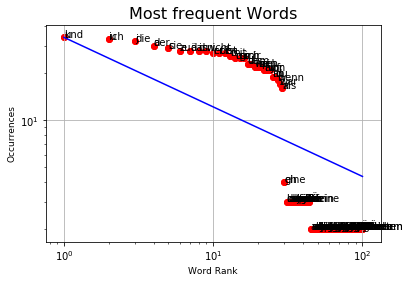

In [19]:
print(randomFile)
# textStats
print("---Text Stats---")
anzahlRandom, woerterbuchRandom = textStats(randomFile,True)
print(anzahlRandom, woerterbuchRandom)
# sort text stats
sortiertDictRandom = sortTextStats(woerterbuchRandom)
tableRandom, SubstantivesRandom = buildTable(sortiertDictRandom)
print("---Table---")
print(tableRandom)
print("Substantive: {0}".format(SubstantivesRandom))
# plot data
xRand,yRand,wordRand = calcPlot(100,sortiertDictRandom)
buildPlot(100, xRand,yRand,wordRand)
# calculate and plot slope
print("---Slope---")
slopeRand = linRegSlope(xRand,yRand,xRand.size)
drawSlope(slopeRand, xRand, yRand, xRand.size)
# calculate exponent of zipf distribution
print("---Exponent of Zipf Distribution")
exponentZipf(xRand,yRand,xRand.size)